<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null int64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       0 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(1), int64(5), object(5)
memory usage: 80.6+ KB


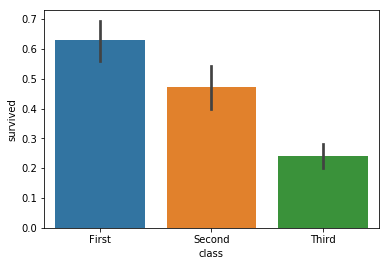

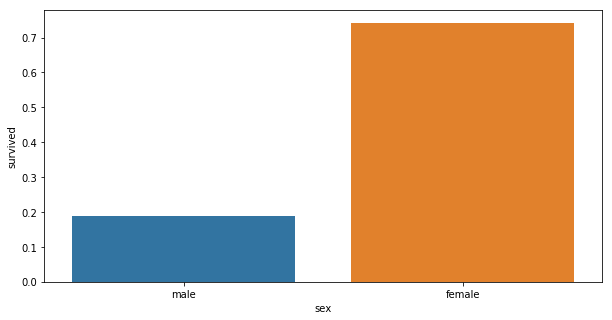

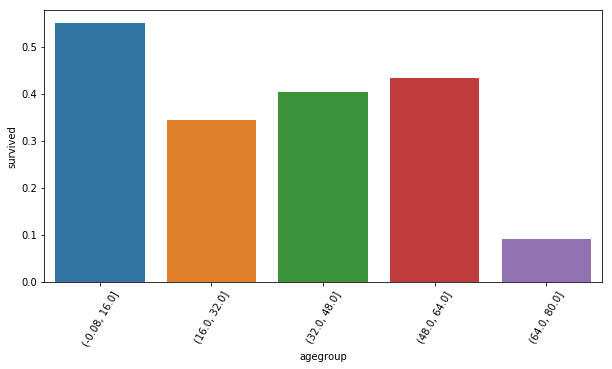

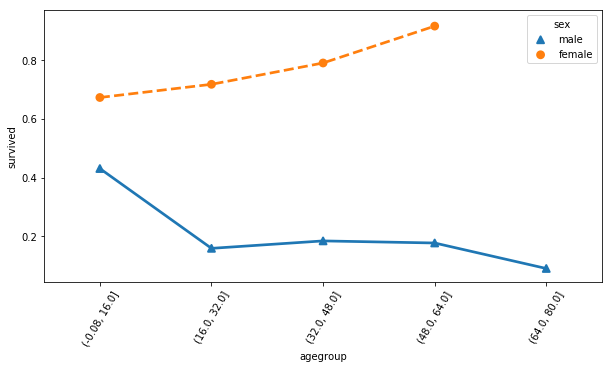

In [1]:
# 导入用于分析与绘图的库
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
titanic=sns.load_dataset('titanic')
titanic.head()

# 处理空值
titanic['age'] = titanic['age'].fillna(titanic['age'].mean()).astype(np.int64)
titanic['embarked'] = titanic['embarked'].fillna({"embarked":"S"},inplace=True)
titanic.info()

# 分析几等舱与生还率
sns.barplot(x='class',y='survived',data=titanic)

# 分析性别与生还率
plt.figure(figsize=(10,5))
sns.barplot(data=titanic,x='sex',y='survived',ci=None) 
plt.show()

# 分析年龄与生还率
titanic['agegroup'] = pd.cut(titanic['age'],5) # 将年龄的列数值划分为五等份
titanic.agegroup.value_counts(sort=False)
plt.figure(figsize=(10,5))
sns.barplot(data=titanic,x='agegroup',y='survived',ci=None)
plt.xticks(rotation=60) # 设置标签刻度角度
plt.show()

# 性别与年龄因素生还率关系
titanic.pivot_table(values='survived',index='agegroup',columns='sex',aggfunc=np.mean)
plt.figure(figsize= (10 ,5))
sns.pointplot(data=titanic,x="agegroup",y="survived",hue="sex",ci=None,markers=["^","o"], linestyles=["-", "--"])
plt.xticks(rotation=60)
plt.show()